# Testing MultiMarker for single-term boolean function probabilistic learning

In [122]:
import babool as bb
import numpy as np
figfolder = '/home/paulo/Documents/papers/IPG/'

## Generating data

In [260]:
# For replication purposes, set seed to 1910
np.random.seed(1910)

In [261]:
# First scenario
N = 2000
p = 100
ktrue = 3
k2true = 2
p0true = 0.1
p1true = 0.9

### Single marker case

In [262]:
# Marker
markers = list(range(ktrue))

M = np.zeros(shape = (N, p))
y = np.zeros(shape = (N))

# Generate marginal probabiliites for X
pvar = np.random.uniform(low= 0.1, high = 0.9, size = p)

nmarker = 0

for cont in range(N):
    v = np.random.binomial(n = 1, p = pvar, size = (1, p))
    
    # Apply marker
    mark = v[:, markers].prod()
    
    if mark == 1:
        nmarker += 1
        u = np.random.binomial(1, p1true)
    else:
        u = np.random.binomial(1, p0true)

    M[cont, :] = v
    y[cont] = u
print("{} affected and {} marked individuals on a total of {} cases".format(sum(y), nmarker, N))

205.0 affected and 17 marked individuals on a total of 2000 cases


### Two markers

In [247]:
# Marker
markers = [list(range(ktrue)), list(range(ktrue, ktrue + k2true))]

M = np.zeros(shape = (N, p))
y = np.zeros(shape = (N))

# Generate marginal probabiliites for X
pvar = np.random.uniform(low= 0.1, high = 0.9, size = p)

nmarker = 0

for cont in range(N):
    v = np.random.binomial(n = 1, p = pvar, size = (1, p))
    
    # Apply marker
    mark = v[:, markers[0]].prod() + v[:,markers[1]].prod()
    
    if mark > 0:
        nmarker += 1
        u = np.random.binomial(1, p1true)
    else:
        u = np.random.binomial(1, p0true)

    M[cont, :] = v
    y[cont] = u
print("{} affected and {} marked individuals on a total of {} cases".format(sum(y), nmarker, N))

393.0 affected and 237 marked individuals on a total of 2000 cases


## Single marker boolean function learning

### Creates object

In [254]:
model = bb.MultiMarker(theta = None)

### Train model

In [255]:
%%time
nchains = 4
njobs = -1
nsteps = 10000
nwarm = 5000

results = model.fit(M, y, nchains, njobs, nsteps, nwarm)

CPU times: user 313 ms, sys: 64.4 ms, total: 378 ms
Wall time: 18.8 s


### Analyzing results

In [256]:
import pandas as pd
from matplotlib import pyplot as plt

In [257]:
# Function to convert multimarker array to string
def convert_array(x):
    if len(x) == 0:
        return ''
    s = str(x[0])
    for i in range(1,len(x)):
        s = s  + ' ' + str(x[i])
    return '[' + s + ']'

Plotting posterior histograms and traceplots for $\pi_0$ and $\pi_1$

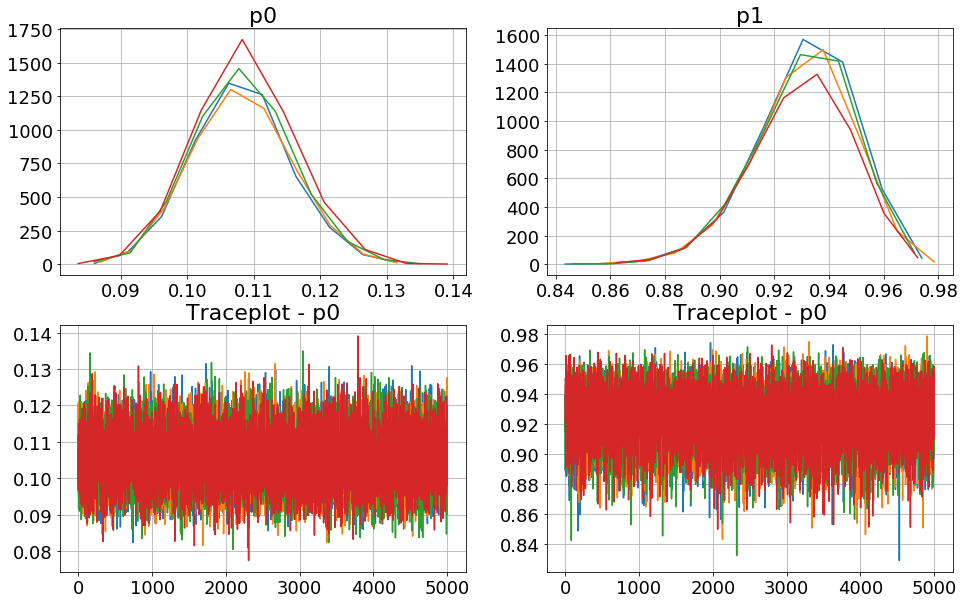

In [258]:
# Plotting posterior histogram for all chains
fig, axs = plt.subplots(2, 2, figsize = (16, 10))

for ax in axs.flatten():
    xtl = ax.get_xticklabels() + ax.get_yticklabels()
    [x.set_fontsize(18) for x in xtl]
    
for r in results:
    yval, xval = np.histogram([p[1] for p in r])
    axs[0,0].plot(xval[1:], yval)
    
axs[0,0].grid(True)
axs[0,0].title.set_text("p0")
axs[0,0].title.set_fontsize(22)

for r in results:
    yval, xval = np.histogram([p[2] for p in r])
    axs[0,1].plot(xval[1:], yval)
    
axs[0,1].grid(True)
axs[0,1].title.set_text("p1")
axs[0,1].title.set_fontsize(22)

for r in results:
    axs[1,0].plot([p[1] for p in r])
    
axs[1,0].title.set_text("Traceplot - p0")
axs[1,0].title.set_fontsize(22)
axs[1,0].grid(True)

for r in results:
    axs[1,1].plot([p[2] for p in r])
    
axs[1,1].title.set_text("Traceplot - p0")
axs[1,1].title.set_fontsize(22)
axs[1,1].grid(True)

plt.savefig(figfolder + 'fig3.png')
plt.show()

Plot posterior histogram for the multivariate marker

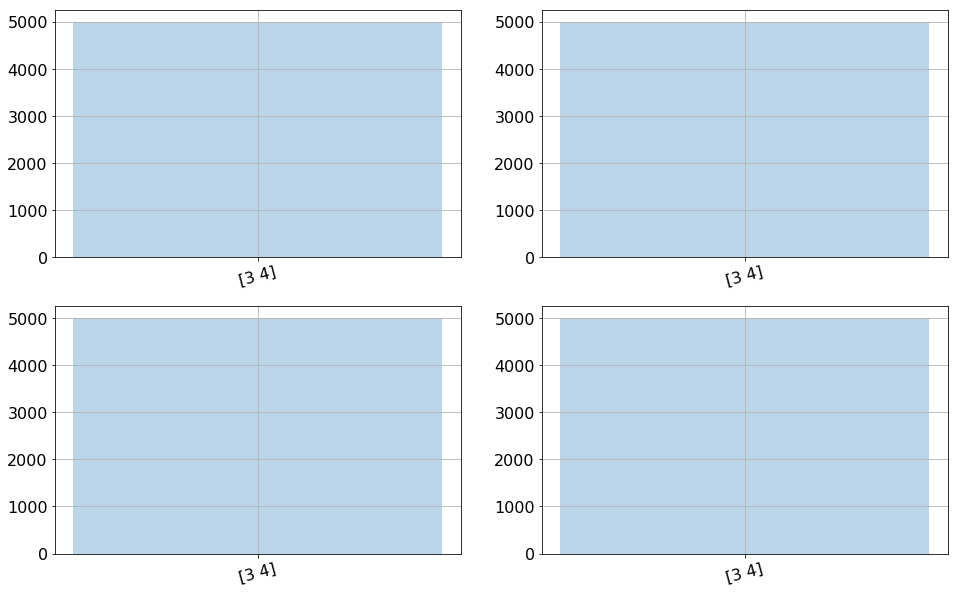

In [259]:
fig, axs = plt.subplots(2, 2, figsize = (16, 10))

for ax in axs.flatten():
    xtl = ax.get_xticklabels()
    [x.set_rotation(15) for x in xtl]

for ax in axs.flatten():
    xtl = ax.get_xticklabels() + ax.get_yticklabels()
    [x.set_fontsize(16) for x in xtl]

r = results[0]
df = pd.DataFrame([convert_array(p[0]) for p in r])
df.columns = ['marker']
markdist = df.marker.value_counts()
axs[0,0].bar(x = markdist[markdist > (nsteps - nwarm) / 100].index.values, height = markdist[markdist > (nsteps - nwarm) / 100].values, alpha = 0.3)
axs[0,0].grid(True)

r = results[1]
df = pd.DataFrame([convert_array(p[0]) for p in r])
df.columns = ['marker']
markdist = df.marker.value_counts()
axs[0,1].bar(x = markdist[markdist > (nsteps - nwarm) / 100].index.values, height = markdist[markdist > (nsteps - nwarm) / 100].values, alpha = 0.3)
axs[0,1].grid(True)

r = results[2]
df = pd.DataFrame([convert_array(p[0]) for p in r])
df.columns = ['marker']
markdist = df.marker.value_counts()
axs[1,0].bar(x = markdist[markdist > (nsteps - nwarm) / 100].index.values, height = markdist[markdist > (nsteps - nwarm) / 100].values, alpha = 0.3)
axs[1,0].grid(True)

r = results[3]
df = pd.DataFrame([convert_array(p[0]) for p in r])
df.columns = ['marker']
markdist = df.marker.value_counts()
axs[1,1].bar(x = markdist[markdist > (nsteps - nwarm) / 100].index.values, height = markdist[markdist > (nsteps - nwarm) / 100].values, alpha = 0.3)
axs[1,1].grid(True)

plt.savefig(figfolder + 'fig4.png')
plt.show()